In [62]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

img_haar = pd.read_csv("Haar_Image_Actual_Predicted.csv") 
img_mar = pd.read_csv("Mar_Image_Actual_Predicted.csv") 

img_haar.head()

,ImgNo,ActualSmile,PredictedSmile
0,100,1,0
1,1000,1,0
2,10007,1,0
3,10009,1,0
4,10011,1,0


In [63]:
img_mar.head()

,ImgNo,ActualSmile,PredictedSmile
0,100,1,0
1,1000,1,0
2,10007,1,0
3,10009,1,0
4,10011,1,0


In [64]:
haar_confusion_matrix = pd.crosstab(img_haar['ActualSmile'], img_haar['PredictedSmile'], rownames=['Actual'], colnames=['Predicted'])
print (haar_confusion_matrix)

Predicted     0    1
Actual              
0          9459   16
1          3586  104


In [65]:
haar_TN = 9459
haar_FN = 3586
haar_FP = 16
haar_TP = 104

In [66]:
mar_confusion_matrix = pd.crosstab(img_mar['ActualSmile'], img_mar['PredictedSmile'], rownames=['Actual'], colnames=['Predicted'])
print (mar_confusion_matrix)

Predicted     0     1
Actual               
0          5033  4442
1          2536  1154


In [67]:
mar_TN = 5033
mar_FN = 2536
mar_FP = 4442
mar_TP = 1154

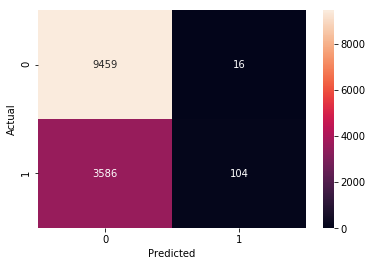

In [68]:
sn.heatmap(haar_confusion_matrix, annot=True, fmt='d')
plt.show()

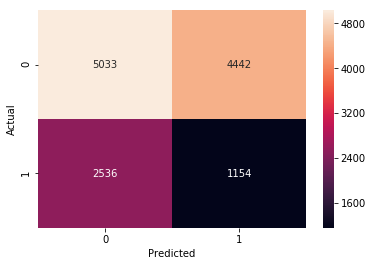

In [69]:
sn.heatmap(mar_confusion_matrix, annot=True, fmt='d')
plt.show()

In [70]:
population = 13165 #total positive n negative dataset

haar_accuracy = (haar_TP + haar_TN) / population
haar_precision = haar_TP / (haar_TP + haar_FP)
haar_recall = haar_TP / (haar_TP + haar_FN)
if (haar_precision + haar_recall) == 0:
    haar_f1_score = 0.0
else:
    haar_f1_score = 2 * (haar_precision * haar_recall) / (haar_precision + haar_recall)


mar_accuracy = (mar_TP + mar_TN) / population
mar_precision = mar_TP / (mar_TP + mar_FP)
mar_recall = mar_TP / (mar_TP + mar_FN)
mar_f1_score = 2 * (mar_precision * mar_recall) / (mar_precision + mar_recall)

In [71]:
print("Accuracy HAAR (Image): " + str(haar_accuracy))
print("Precision HAAR (Image): " + str(haar_precision))
print("Recall HAAR (Image): " + str(haar_recall))
print("F1-Score HAAR (Image): " + str(haar_f1_score))
print(" ")
print("Accuracy MAR (Image): " + str(mar_accuracy))
print("Precision MAR (Image): " + str(mar_precision))
print("Recall MAR (Image): " + str(mar_recall))
print("F1-Score MAR (Image): " + str(mar_f1_score))

Accuracy HAAR (Image): 0.7263957462969997
Precision HAAR (Image): 0.8666666666666667
Recall HAAR (Image): 0.028184281842818428
F1-Score HAAR (Image): 0.05459317585301837
 
Accuracy MAR (Image): 0.4699582225598177
Precision MAR (Image): 0.20621872766261615
Recall MAR (Image): 0.31273712737127374
F1-Score MAR (Image): 0.24854619857850527


In [72]:
from pandas_ml import ConfusionMatrix

Haar_Confusion_Matrix = ConfusionMatrix(img_haar['ActualSmile'], img_haar['PredictedSmile'])
Haar_Confusion_Matrix.print_stats()

population: 13165
P: 3690
N: 9475
PositiveTest: 120
NegativeTest: 13045
TP: 104
TN: 9459
FP: 16
FN: 3586
TPR: 0.028184281842818428
TNR: 0.998311345646438
PPV: 0.8666666666666667
NPV: 0.7251054043694902
FPR: 0.0016886543535620053
FDR: 0.13333333333333333
FNR: 0.9718157181571816
ACC: 0.7263957462969997
F1_score: 0.05459317585301837
MCC: 0.125217300532793
informedness: 0.02649562748925649
markedness: 0.5917720710361569
prevalence: 0.28028864413216864
LRP: 16.690379403794037
LRN: 0.9734595548725337
DOR: 17.14542665923034
FOR: 0.2748945956305098


In [73]:
Mar_Confusion_Matrix = ConfusionMatrix(img_mar['ActualSmile'], img_mar['PredictedSmile'])
Mar_Confusion_Matrix.print_stats()

population: 13165
P: 3690
N: 9475
PositiveTest: 5596
NegativeTest: 7569
TP: 1154
TN: 5033
FP: 4442
FN: 2536
TPR: 0.31273712737127374
TNR: 0.5311873350923483
PPV: 0.20621872766261615
NPV: 0.6649491346280882
FPR: 0.4688126649076517
FDR: 0.7937812723373838
FNR: 0.6872628726287263
ACC: 0.4699582225598177
F1_score: 0.24854619857850527
MCC: -0.1418010759653783
informedness: -0.15607553753637804
markedness: -0.12883213770929558
prevalence: 0.28028864413216864
LRP: 0.6670833592622284
LRN: 1.2938239058528078
DOR: 0.515590534573195
FOR: 0.33505086537191175


Text(0.5, 0, 'Methods')

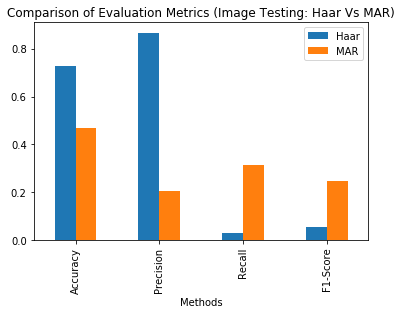

In [76]:
haar_vs_maar_img = pd.DataFrame({
    "Haar":[haar_accuracy, haar_precision, haar_recall, haar_f1_score],
    "MAR":[mar_accuracy, mar_precision, mar_recall, mar_f1_score],
    }, 
    index=["Accuracy", "Precision", "Recall", "F1-Score"]
)

haar_vs_maar_img.plot(kind="bar")
plt.title("Comparison of Evaluation Metrics (Image Testing: Haar Vs MAR)")
plt.xlabel("Methods")